New York City Taxi Fare Prediction

![image.png](attachment:image.png)

Dataset Link: https://www.kaggle.com/c/new-york-city-taxi-fare-prediction

We'll train a machine learning model to predict the fare for a taxi ride in New York city given information like pickup date & time, pickup location, drop location and no. of passengers.

This dataset is taken from a Kaggle competition organized by Google Cloud. It contains over 55 millions rows of training data. We'll attempt to achieve a respectable score in the competition using just a fraction of the data.

Observations:

- This is a supervised learning regression problem
- Training data is 5.5 GB in size
- Training data has 5.5 million rows
- Test set is much smaller (< 10,000 rows)
- The training set has 8 columns:
- key (a unique identifier)
- fare_amount (target column)
- pickup_datetime
- pickup_longitude
- pickup_latitude
- dropoff_longitude
- dropoff_latitude
- passenger_count
- The test set has all columns except the target column fare_amount.
- The submission file should contain the key and fare_amount for each test sample.

Loading Training Set

Loading the entire dataset into Pandas is going to be slow, so we can use the following optimizations:

- Ignore the key column
- Parse pickup datetime while loading data
- Specify data types for other columns
    - float32 for geo coordinates
    - float32 for fare amount
    - uint8 for passenger count
- Work with a 1% sample of the data (~500k rows)
- We can apply these optimizations while using pd.read_csv

In [1]:
import pandas as pd
import random

In [2]:
sample_frac = 0.01

In [3]:
selected_cols = 'fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count'.split(',')
dtypes = {
    'fare_amount': 'float32',
    'pickup_longitude': 'float32',
    'picktup_latitude': 'float32',
    'dropoff_longitude': 'float32',
    'passenger_count':'float32'
}

def skip_row(row_idx):
    if row_idx == 0:
        return False
    return random.random() > sample_frac

random.seed(42)

df = pd.read_csv(r'C:\Users\Dell\Downloads\Data Science Stuff\Datasets\Project 7\new-york-city-taxi-fare-prediction\train.csv',
                usecols=selected_cols,
                dtype=dtypes,
                parse_dates=['pickup_datetime'],
                skiprows=skip_row
                )

In [4]:
test_df = pd.read_csv(r'C:\Users\Dell\Downloads\Data Science Stuff\Datasets\Project 7\new-york-city-taxi-fare-prediction\test.csv', 
                    dtype=dtypes, parse_dates=['pickup_datetime'])

In [5]:
df

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,4.0,2014-12-06 20:36:22+00:00,-73.979813,40.751902,-73.979446,40.755481,1.0
1,8.0,2013-01-17 17:22:00+00:00,0.000000,0.000000,0.000000,0.000000,2.0
2,8.9,2011-06-15 18:07:00+00:00,-73.996330,40.753225,-73.978897,40.766963,3.0
3,6.9,2009-12-14 12:33:00+00:00,-73.982430,40.745747,-73.982430,40.745747,1.0
4,7.0,2013-11-06 11:26:54+00:00,-73.959061,40.781061,-73.962059,40.768604,1.0
...,...,...,...,...,...,...,...
552445,45.0,2014-02-06 23:59:45+00:00,-73.973587,40.747669,-73.999916,40.602893,1.0
552446,22.5,2015-01-05 15:29:08+00:00,-73.935928,40.799656,-73.985710,40.726952,2.0
552447,4.5,2013-02-17 22:27:00+00:00,-73.992531,40.748620,-73.998436,40.740142,1.0
552448,14.5,2013-01-27 12:41:00+00:00,-74.012115,40.706635,-73.988724,40.756217,1.0


In [6]:
test_df

,key,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2015-01-27 13:08:24.0000002,2015-01-27 13:08:24+00:00,-73.973320,40.763805,-73.981430,40.743835,1.0
1,2015-01-27 13:08:24.0000003,2015-01-27 13:08:24+00:00,-73.986862,40.719383,-73.998886,40.739201,1.0
2,2011-10-08 11:53:44.0000002,2011-10-08 11:53:44+00:00,-73.982521,40.751260,-73.979652,40.746139,1.0
3,2012-12-01 21:12:12.0000002,2012-12-01 21:12:12+00:00,-73.981163,40.767807,-73.990448,40.751635,1.0
4,2012-12-01 21:12:12.0000003,2012-12-01 21:12:12+00:00,-73.966049,40.789775,-73.988564,40.744427,1.0
...,...,...,...,...,...,...,...
9909,2015-05-10 12:37:51.0000002,2015-05-10 12:37:51+00:00,-73.968124,40.796997,-73.955643,40.780388,6.0
9910,2015-01-12 17:05:51.0000001,2015-01-12 17:05:51+00:00,-73.945511,40.803600,-73.960213,40.776371,6.0
9911,2015-04-19 20:44:15.0000001,2015-04-19 20:44:15+00:00,-73.991600,40.726608,-73.789742,40.647011,6.0
9912,2015-01-31 01:05:19.0000005,2015-01-31 01:05:19+00:00,-73.985573,40.735432,-73.939178,40.801731,6.0


Explore the Dataset
- Basic info about training set
- Basic info about test set
- Exploratory data analysis & visualization

In [7]:
df.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,552450.000000,552450.000000,552450.000000,552450.000000,552450.000000,552450.000000
mean,11.354059,-72.497063,39.910494,-72.504326,39.934257,1.684983
std,9.811924,11.618246,8.061115,12.074346,9.255058,1.337664
min,-52.000000,-1183.362793,-3084.490315,-3356.729736,-2073.150613,0.000000
25%,6.000000,-73.992020,40.734873,-73.991425,40.733988,1.000000
50%,8.500000,-73.981819,40.752620,-73.980179,40.753102,1.000000
75%,12.500000,-73.967155,40.767037,-73.963737,40.768060,2.000000
max,499.000000,2420.209473,404.983332,2467.752686,3351.403027,208.000000


In [8]:
df.pickup_datetime.min(), df.pickup_datetime.max()

(Timestamp('2009-01-01 00:11:46+0000', tz='UTC'),
 Timestamp('2015-06-30 23:59:54+0000', tz='UTC'))

As we can see now we are going to have to perform some data cleaning because on longitude and latitude there are some -ve value which can be possible as well as on passenger count there are is max 208 which can be possible in taxi 

Observations about training data:

- 550k+ rows, as expected
- No missing data (in the sample)
- fare_amount ranges from $-52.0 to $499.0
- passenger_count ranges from 0 to 208
- There seem to be some errors in the latitude & longitude values
- Dates range from 1st Jan 2009 to 30th June 2015
- The dataset takes up ~19 MB of space in the RAM
- We may need to deal with outliers and data entry errors before we train our model.

In [9]:
test_df.describe()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000
mean,-73.974716,40.751041,-73.973656,40.751743,1.671273
std,0.042774,0.033541,0.039072,0.035435,1.278747
min,-74.252190,40.573143,-74.263245,40.568973,1.000000
25%,-73.992500,40.736125,-73.991249,40.735254,1.000000
50%,-73.982327,40.753051,-73.980015,40.754065,1.000000
75%,-73.968012,40.767113,-73.964062,40.768757,2.000000
max,-72.986534,41.709555,-72.990967,41.696683,6.000000


In [10]:
test_df.pickup_datetime.min(), test_df.pickup_datetime.max()

(Timestamp('2009-01-01 11:04:24+0000', tz='UTC'),
 Timestamp('2015-06-30 20:03:50+0000', tz='UTC'))

Some observations about the test set:

- 9914 rows of data
- No missing values
- No obvious data entry errors
- 1 to 6 passengers (we can limit training data to this range)
- Latitudes lie between 40 and 42
- Longitudes lie between -75 and -72
- Pickup dates range from Jan 1st 2009 to Jun 30th 2015 (same as training set)
- We can use the ranges of the test set to drop outliers/invalid data from the training set.

Exploratory Data Analysis and Visualization

Create graphs (histograms, line charts, bar charts, scatter plots, box plots, geo maps etc.) to study the distrubtion of values in each column, and the relationship of each input column to the target.

Ask & Answer Questions
Exercise: Ask & answer questions about the dataset:

- What is the busiest day of the week?
- What is the busiest time of the day?
- In which month are fares the highest?
- Which pickup locations have the highest fares?
- Which drop locations have the highest fares?
- What is the average ride distance?

EDA + asking questions will help you develop a deeper understand of the data and give you ideas for feature engineering.

In [12]:
df

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,4.0,2014-12-06 20:36:22+00:00,-73.979813,40.751902,-73.979446,40.755481,1.0
1,8.0,2013-01-17 17:22:00+00:00,0.000000,0.000000,0.000000,0.000000,2.0
2,8.9,2011-06-15 18:07:00+00:00,-73.996330,40.753225,-73.978897,40.766963,3.0
3,6.9,2009-12-14 12:33:00+00:00,-73.982430,40.745747,-73.982430,40.745747,1.0
4,7.0,2013-11-06 11:26:54+00:00,-73.959061,40.781061,-73.962059,40.768604,1.0
...,...,...,...,...,...,...,...
552445,45.0,2014-02-06 23:59:45+00:00,-73.973587,40.747669,-73.999916,40.602893,1.0
552446,22.5,2015-01-05 15:29:08+00:00,-73.935928,40.799656,-73.985710,40.726952,2.0
552447,4.5,2013-02-17 22:27:00+00:00,-73.992531,40.748620,-73.998436,40.740142,1.0
552448,14.5,2013-01-27 12:41:00+00:00,-74.012115,40.706635,-73.988724,40.756217,1.0


Converting pickup_datetime to actual datetime format fo ease 

What is the busiest day of the week?

In [13]:
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])

In [14]:
df['day_of_week'] = df['pickup_datetime'].dt.day_name()

In [15]:
rides_per_day = df['day_of_week'].value_counts().reindex(
    ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
)

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

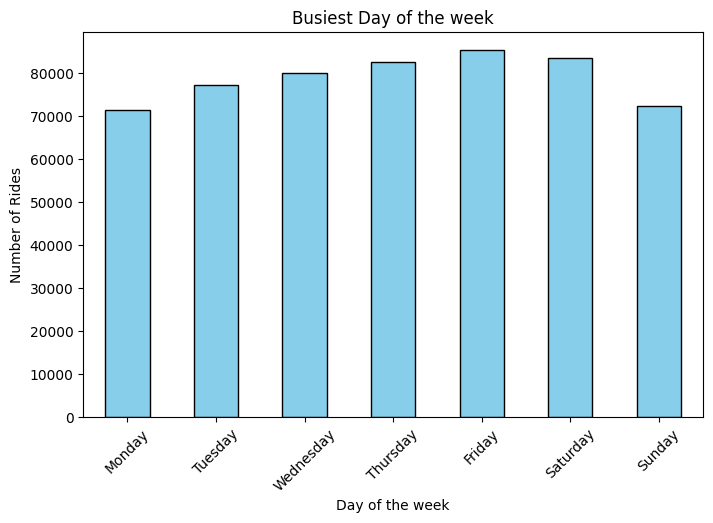

In [24]:
plt.figure(figsize=(8, 5))
rides_per_day.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Busiest Day of the week')
plt.xlabel('Day of the week')
plt.ylabel('Number of Rides')
plt.xticks(rotation=45)
plt.show()

What is the busiest time of the day?

In [ ]:

df['hour_of_day'] = df['pickup_datetime'].dt.hour
rides_per_hour = df['hour_of_day'].value_counts().sort_index()

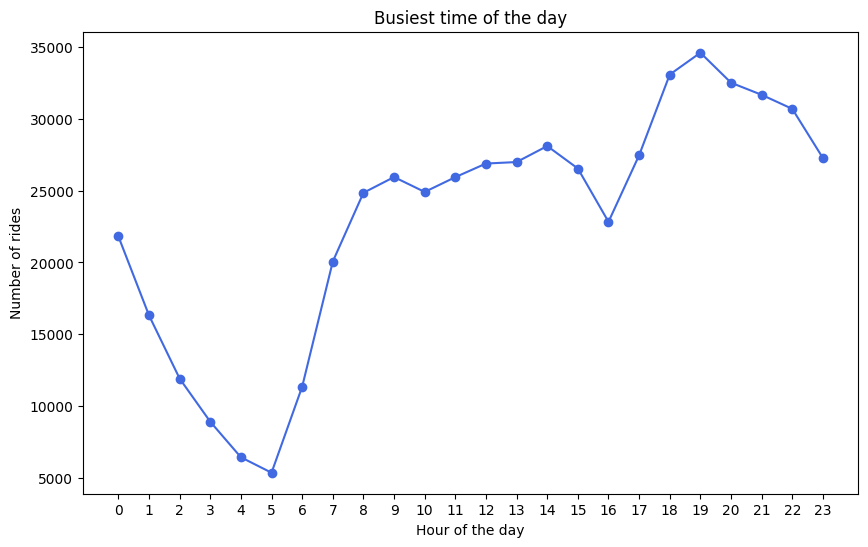

In [29]:
plt.figure(figsize=(10, 6))
rides_per_hour.plot(kind='line', marker='o', color='royalblue')
plt.title('Busiest time of the day')
plt.xlabel('Hour of the day')
plt.ylabel('Number of rides')
plt.xticks(range(0 ,24))

plt.show()

In which month are fares the highest?

In [ ]:

df['month'] = df['pickup_datetime'].dt.month
average_fare_per_month = df.groupby('month')['fare_amount'].mean()
average_fare_per_month

month
1     10.761950
2     10.860509
3     11.190193
4     11.288646
5     11.620192
6     11.556945
7     11.116553
8     11.211175
9     11.739978
10    11.678832
11    11.635730
12    11.667936
Name: fare_amount, dtype: float32

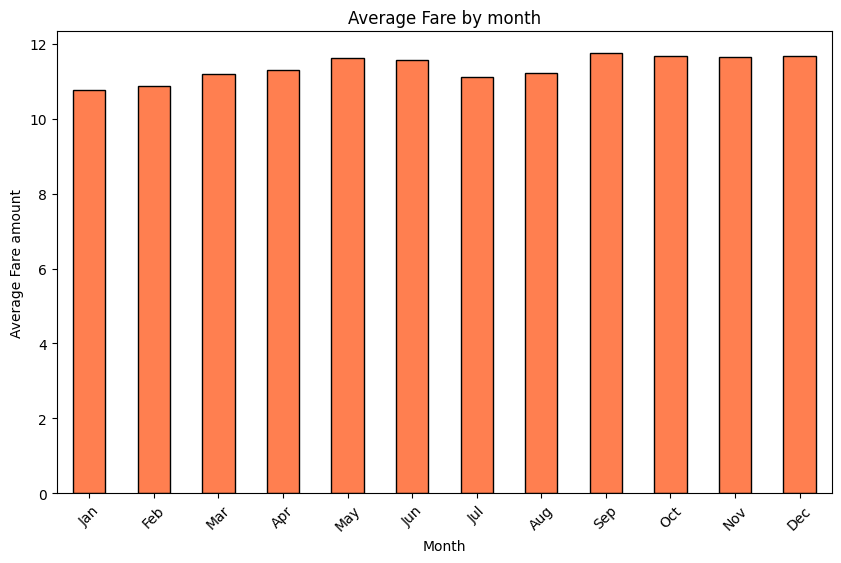

In [32]:
plt.figure(figsize=(10, 6))
average_fare_per_month.plot(kind='bar', color='coral', edgecolor='black')
plt.title('Average Fare by month')
plt.xlabel('Month')
plt.ylabel('Average Fare amount')
plt.xticks(ticks=range(0, 12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=45)
plt.show()

Which pickup locations have the highest fares?

In [ ]:

from sklearn.cluster import KMeans

In [37]:
locations = df[['pickup_longitude', 'pickup_latitude']]

In [39]:
kmeans = KMeans(n_clusters=10, random_state=0).fit(locations)
df['location_cluster'] = kmeans.labels_
average_fare_per_location = df.groupby('location_cluster')['fare_amount'].mean()

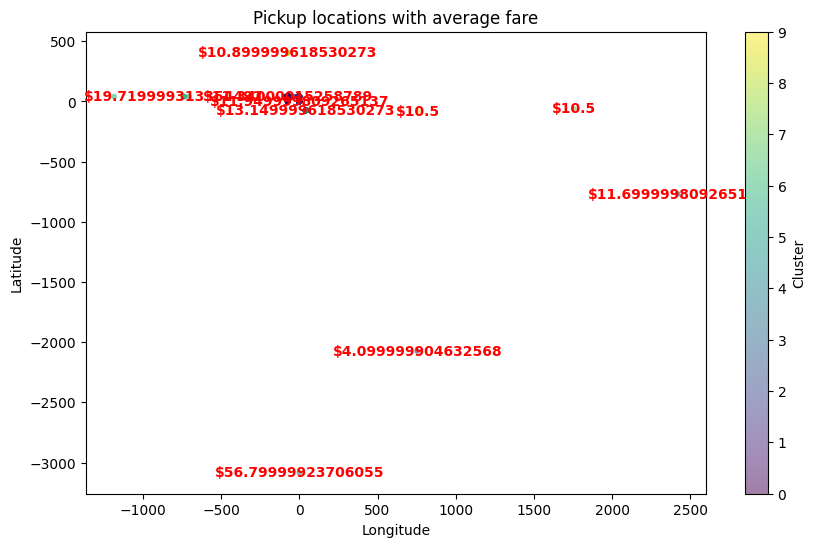

In [40]:
plt.figure(figsize=(10, 6))
scatter = plt.scatter(df['pickup_longitude'], df['pickup_latitude'], c=df['location_cluster'], cmap='viridis', s=10, alpha=0.5)
plt.colorbar(label='Cluster')
plt.title('Pickup locations with average fare')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

for i in range(len(average_fare_per_location)):
    cluster_center = kmeans.cluster_centers_[i]
    avg_fare = round(average_fare_per_location[i], 2)
    plt.text(cluster_center[0], cluster_center[1], f"${avg_fare}", ha='center', va='center', fontweight='bold', color='red')
    
plt.show()

Which drop locations have the highest fares?

In [41]:
drop_locations = df[['dropoff_longitude','dropoff_latitude']]
kmeans = KMeans(n_clusters=10, random_state=0).fit(drop_locations)
df['drop_location_cluster'] = kmeans.labels_
average_fare_per_location = df.groupby('drop_location_cluster')['fare_amount'].mean()

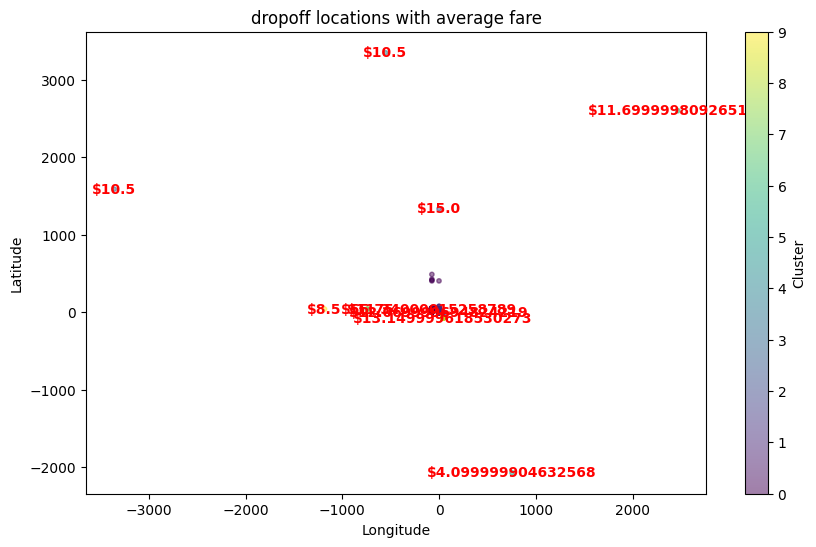

In [42]:
plt.figure(figsize=(10, 6))
scatter = plt.scatter(df['dropoff_longitude'], df['dropoff_latitude'], c=df['drop_location_cluster'], cmap='viridis', s=10, alpha=0.5)
plt.colorbar(label='Cluster')
plt.title('dropoff locations with average fare')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

for i in range(len(average_fare_per_location)):
    cluster_center = kmeans.cluster_centers_[i]
    avg_fare = round(average_fare_per_location[i], 2)
    plt.text(cluster_center[0], cluster_center[1], f"${avg_fare}", ha='center', va='center', fontweight='bold', color='red')
    
plt.show()

What is the average ride distance?

In [43]:
import numpy as np

def haversine(lon1, lat1, lon2, lat2):
    # Radius of Earth in kilometers
    R = 6371.0
    # Convert degrees to radians
    lon1, lat1, lon2, lat2 = map(np.radians, [lon1, lat1, lon2, lat2])
    # Differences in coordinates
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    # Haversine formula
    a = np.sin(dlat / 2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon / 2)**2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))
    # Distance in kilometers
    distance = R * c
    return distance

# Apply the Haversine formula to calculate distance for each ride
df['ride_distance_km'] = haversine(df['pickup_longitude'], df['pickup_latitude'],
                                df['dropoff_longitude'], df['dropoff_latitude'])

# Calculate the average ride distance
average_distance = df['ride_distance_km'].mean()

print(f"The average ride distance is {average_distance:.2f} km")

The average ride distance is 20.19 km


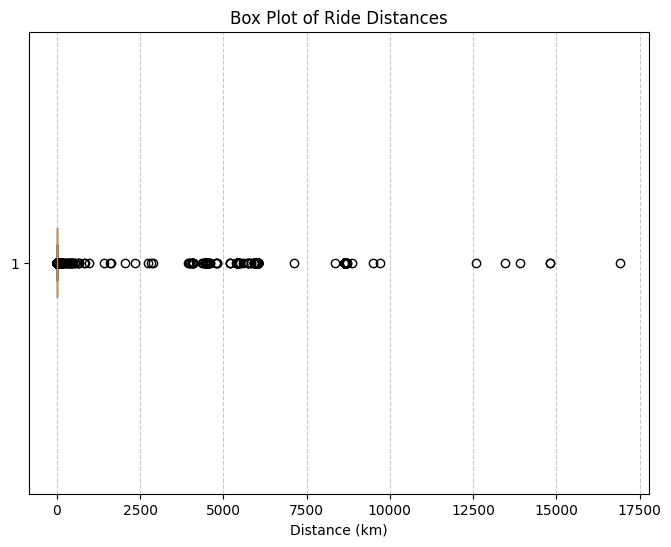

In [45]:
plt.figure(figsize=(8, 6))
plt.boxplot(df['ride_distance_km'], vert=False, patch_artist=True, boxprops=dict(facecolor='skyblue'))
plt.title('Box Plot of Ride Distances')
plt.xlabel('Distance (km)')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

Prepare Dataset for Training
- Split Training & Validation Set
- Fill/Remove Missing Values
- Extract Inputs & Outputs
    - Training
    - Validation
    - Test  

Split Training & Validation Set

We'll set aside 20% of the training data as the validation set, to evaluate the models we train on previously unseen data.

Since the test set and training set have the same date ranges, we can pick a random 20% fraction.

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
train_df, val_df = train_test_split(df, test_size=0.2, random_state=42)

In [15]:
len(train_df), len(val_df)

(441960, 110490)

Fill/Remove Missing Values

There are no missing values in our sample, but if there were, we could simply drop the rows with missing values instead of trying to fill them (since we have a lot of training data)

In [ ]:
train_df = train_df.dropna()
val_df = val_df.dropna()

Extract Inputs and Outputs

In [16]:
train_df.columns

Index(['fare_amount', 'pickup_datetime', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'passenger_count'],
      dtype='object')

In [19]:
input_cols = ['pickup_longitude', 'pickup_latitude','dropoff_longitude', 'dropoff_latitude', 'passenger_count']

In [18]:
target_cols = ['fare_amount']

Training

In [20]:
train_inputs = train_df[input_cols]
train_targets = train_df[target_cols]

In [21]:
train_inputs

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
353352,-73.993652,40.741543,-73.977974,40.742352,4.0
360070,-73.993805,40.724577,-73.993805,40.724577,1.0
372609,-73.959160,40.780749,-73.969116,40.761231,1.0
550895,-73.952187,40.783950,-73.978645,40.772603,1.0
444151,-73.977112,40.746832,-73.991104,40.750403,2.0
...,...,...,...,...,...
110268,-73.987152,40.750635,-73.979073,40.763167,1.0
259178,-73.972656,40.764041,-74.013176,40.707841,2.0
365838,-73.991982,40.749767,-73.989845,40.720552,3.0
131932,-73.969055,40.761398,-73.990814,40.751327,1.0


Validation

In [22]:
val_inputs = val_df[input_cols]
val_targets = val_df[target_cols]
val_inputs

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
15971,-73.995834,40.759190,-73.973679,40.739086,1.0
149839,-73.977386,40.738333,-73.976143,40.751204,1.0
515867,-73.983910,40.749470,-73.787170,40.646643,1.0
90307,-73.790794,40.643463,-73.972252,40.690180,1.0
287032,-73.976593,40.761944,-73.991463,40.750309,2.0
...,...,...,...,...,...
467556,-73.968567,40.761240,-73.983406,40.750020,3.0
19482,-73.986725,40.755922,-73.985855,40.731170,1.0
186063,0.000000,0.000000,0.000000,0.000000,1.0
382260,-73.980057,40.760335,-73.872589,40.774298,1.0


Test

In [25]:
test_inputs = test_df[input_cols]
test_inputs

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,-73.973320,40.763805,-73.981430,40.743835,1.0
1,-73.986862,40.719383,-73.998886,40.739201,1.0
2,-73.982521,40.751260,-73.979652,40.746139,1.0
3,-73.981163,40.767807,-73.990448,40.751635,1.0
4,-73.966049,40.789775,-73.988564,40.744427,1.0
...,...,...,...,...,...
9909,-73.968124,40.796997,-73.955643,40.780388,6.0
9910,-73.945511,40.803600,-73.960213,40.776371,6.0
9911,-73.991600,40.726608,-73.789742,40.647011,6.0
9912,-73.985573,40.735432,-73.939178,40.801731,6.0


Train Hardcoded & Baseline Models

    - Hardcoded model: always predict average fare
    - Baseline model: Linear regression
For evaluation the dataset uses RMSE error:
https://www.kaggle.com/c/new-york-city-taxi-fare-prediction/overview/evaluation

Train & Evaluate Hardcoded Model

Let's create a simple model that always predicts the average.

In [26]:
import numpy as np

In [27]:
class MeanRegressor():
    def fit(self, inputs, targets):
        self.mean = targets.mean()
        
    def predict(self, inputs):
        return np.full(inputs.shape[0], self.mean)

In [28]:
mean_model = MeanRegressor()

In [29]:
mean_model.fit(train_inputs, train_targets)

In [30]:
mean_model.mean

fare_amount    11.354714
dtype: float32

In [31]:
train_preds = mean_model.predict(train_inputs)

In [32]:
train_preds

array([11.354714, 11.354714, 11.354714, ..., 11.354714, 11.354714,
       11.354714], dtype=float32)

In [33]:
val_preds = mean_model.predict(val_inputs)

In [34]:
val_preds

array([11.354714, 11.354714, 11.354714, ..., 11.354714, 11.354714,
       11.354714], dtype=float32)

In [35]:
from sklearn.metrics import root_mean_squared_error

In [ ]:
train_rmse = root_mean_squared_error(train_targets, train_preds)

In [ ]:
train_rmse

np.float64(9.788632669910303)

In [47]:
val_rmse = root_mean_squared_error(val_targets, val_preds)
val_rmse

np.float32(9.899954)

Our dumb hard-coded model is off by $9.899 on average, which is pretty bad considering the average fare is $11.35.



Train & Evaluate Baseline Model

We'll traina linear regression model as our baseline, which tries to express the target as a weighted sum of the inputs.

In [39]:
from sklearn.linear_model import LinearRegression

In [40]:
linear_model = LinearRegression()

In [41]:
linear_model.fit(train_inputs, train_targets)

LinearRegression()

In [42]:
train_preds = linear_model.predict(train_inputs)

In [43]:
train_preds

array([[11.54623682],
       [11.2846095 ],
       [11.28413942],
       ...,
       [11.45891673],
       [11.28428006],
       [11.28444733]])

In [44]:
train_targets

,fare_amount
353352,6.0
360070,3.7
372609,10.0
550895,8.9
444151,7.3
...,...
110268,9.3
259178,18.5
365838,10.1
131932,10.9


In [50]:
val_preds = linear_model.predict(val_inputs)
val_preds

array([[11.28432795],
       [11.28449551],
       [11.28478054],
       ...,
       [11.80449938],
       [11.28443342],
       [11.28413233]])

In [52]:
train_rmse = root_mean_squared_error(train_targets, train_preds)
train_rmse

np.float64(9.788632669910303)

In [54]:
val_rmse = root_mean_squared_error(val_targets, val_preds)
val_rmse

np.float64(9.898088220636206)

The linear regression model is off by $9.898, which isn't much better than simply predicting the average.

This is mainly because the training data (geocoordinates) is not in a format that's useful for the model, and we're not using one of the most important columns: pickup date & time.

However, now we have a baseline that our other models should ideally beat.

Feature Engineering

    - Extract parts of date
    - Remove outliers & invalid data
    - Add distance between pickup & drop
    - Add distance from landmarks
Exercise: We're going to apply all of the above together, but you should observer the effect of adding each feature individually.

Extract Parts of Date

    - Year
    - Month
    - Day
    - Weekday
    - Hour

In [ ]:
def add_dateparts(df, col):
    df[col + '_year'] = df[col].dt.year
    df[col + '_month'] = df[col].dt.month
    df[col + '_day'] = df[col].dt.day
    df[col + '_weekday'] = df[col].dt.weekday
    df[col + '_hour'] = df[col].dt.hour

In [59]:
train_df['pickup_datetime'] = pd.to_datetime(train_df['pickup_datetime'], errors='coerce')
val_df['pickup_datetime'] = pd.to_datetime(val_df['pickup_datetime'], errors='coerce')
test_df['pickup_datetime'] = pd.to_datetime(test_df['pickup_datetime'], errors='coerce')


In [60]:
add_dateparts(train_df, 'pickup_datetime')
add_dateparts(val_df, 'pickup_datetime')
add_dateparts(test_df, 'pickup_datetime')

In [61]:
train_df

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_datetime_year,pickup_datetime_month,pickup_datetime_day,pickup_datetime_weekday,pickup_datetime_hour
353352,6.0,2015-04-12 03:40:38+00:00,-73.993652,40.741543,-73.977974,40.742352,4.0,2015,4,12,6,3
360070,3.7,2011-01-26 19:21:00+00:00,-73.993805,40.724577,-73.993805,40.724577,1.0,2011,1,26,2,19
372609,10.0,2012-10-03 10:40:17+00:00,-73.959160,40.780749,-73.969116,40.761231,1.0,2012,10,3,2,10
550895,8.9,2012-03-14 13:44:27+00:00,-73.952187,40.783950,-73.978645,40.772603,1.0,2012,3,14,2,13
444151,7.3,2012-02-05 15:33:00+00:00,-73.977112,40.746832,-73.991104,40.750403,2.0,2012,2,5,6,15
...,...,...,...,...,...,...,...,...,...,...,...,...
110268,9.3,2009-09-06 16:12:00+00:00,-73.987152,40.750635,-73.979073,40.763167,1.0,2009,9,6,6,16
259178,18.5,2009-04-12 09:58:56+00:00,-73.972656,40.764041,-74.013176,40.707841,2.0,2009,4,12,6,9
365838,10.1,2012-07-12 19:30:00+00:00,-73.991982,40.749767,-73.989845,40.720552,3.0,2012,7,12,3,19
131932,10.9,2011-02-17 18:33:00+00:00,-73.969055,40.761398,-73.990814,40.751327,1.0,2011,2,17,3,18


Add Distance Between Pickup and Drop
We can use the haversine distance:

    - https://en.wikipedia.org/wiki/Haversine_formula
    - https://stackoverflow.com/questions/29545704/fast-haversine-approximation-python-pandas

In [66]:
import numpy as np

def haversine_np(lon1, lat1, lon2, lat2):
    lon1, lat1, lon2, lat2 = map(np.radians, [lon1, lat1, lon2, lat2])
    
    dlon = lon2 - lon1
    dlat = lat2 - lat2
    
    a = np.sin(dlat/2.0) ** 2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2.0) ** 2
    c = 2 * np.arcsin(np.sqrt(a))
    km = 6367 * c
    return km

In [67]:
def add_trip_distance(df):
    df['trip_distance'] = haversine_np(
        df['pickup_longitude'],
        df['pickup_latitude'],
        df['dropoff_longitude'],
        df['dropoff_latitude'])

In [68]:
add_trip_distance(train_df)
add_trip_distance(val_df)
add_trip_distance(test_df)

c:\Users\Dell\Downloads\Data Science Stuff\Machine Learning\.venv\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [69]:
train_df

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_datetime_year,pickup_datetime_month,pickup_datetime_day,pickup_datetime_weekday,pickup_datetime_hour,trip_distance
353352,6.0,2015-04-12 03:40:38+00:00,-73.993652,40.741543,-73.977974,40.742352,4.0,2015,4,12,6,3,1.320351
360070,3.7,2011-01-26 19:21:00+00:00,-73.993805,40.724577,-73.993805,40.724577,1.0,2011,1,26,2,19,0.000000
372609,10.0,2012-10-03 10:40:17+00:00,-73.959160,40.780749,-73.969116,40.761231,1.0,2012,10,3,2,10,0.838079
550895,8.9,2012-03-14 13:44:27+00:00,-73.952187,40.783950,-73.978645,40.772603,1.0,2012,3,14,2,13,2.226587
444151,7.3,2012-02-05 15:33:00+00:00,-73.977112,40.746832,-73.991104,40.750403,2.0,2012,2,5,6,15,1.178191
...,...,...,...,...,...,...,...,...,...,...,...,...,...
110268,9.3,2009-09-06 16:12:00+00:00,-73.987152,40.750635,-73.979073,40.763167,1.0,2009,9,6,6,16,0.680150
259178,18.5,2009-04-12 09:58:56+00:00,-73.972656,40.764041,-74.013176,40.707841,2.0,2009,4,12,6,9,3.411597
365838,10.1,2012-07-12 19:30:00+00:00,-73.991982,40.749767,-73.989845,40.720552,3.0,2012,7,12,3,19,0.179439
131932,10.9,2011-02-17 18:33:00+00:00,-73.969055,40.761398,-73.990814,40.751327,1.0,2011,2,17,3,18,1.831187


Add Distance From Popular Landmarks

    - JFK Airport
    - LGA Airport
    - EWR Airport
    - Times Square
    - Met Meuseum
    - World Trade Center

We'll add the distance from drop location.

In [70]:
jfk_lonlat = -73.7781, 40.6413
lga_lonlat = -73.8740, 40.7769
ewr_lonlat = -74.1745, 40.6895
met_lonlat = -73.9632, 40.7794
wtc_lonlat = -74.0099, 40.7126

In [ ]:
def add_landmark_dropoff_distance(df, landmark_name, landmark_lonlat):
    lon, lat = landmark_lonlat
    df[landmark_name + '_drop_distance'] = haversine_np(lon, lat, df['dropoff_longitude'], df['dropoff_latitude'])

In [74]:
for a_df in [train_df, val_df, test_df]:
    for name, lonlat in [('jfk', jfk_lonlat), ('lga', lga_lonlat), ('ewr', ewr_lonlat), ('met', met_lonlat), ('wtc', wtc_lonlat)]:
        add_landmark_dropoff_distance(a_df, name, lonlat)

c:\Users\Dell\Downloads\Data Science Stuff\Machine Learning\.venv\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\Users\Dell\Downloads\Data Science Stuff\Machine Learning\.venv\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\Users\Dell\Downloads\Data Science Stuff\Machine Learning\.venv\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\Users\Dell\Downloads\Data Science Stuff\Machine Learning\.venv\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\Users\Dell\Downloads\Data Science Stuff\Machine Learning\.venv\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: in

In [75]:
train_df.sample(5)

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_datetime_year,pickup_datetime_month,pickup_datetime_day,pickup_datetime_weekday,pickup_datetime_hour,trip_distance,jfk_drop_distance,lga_drop_distance,ewr_drop_distance,met_drop_distance,wtc_drop_distance
239471,4.5,2010-10-27 02:47:56+00:00,-74.006584,40.739644,-73.996994,40.747250,1.0,2010,10,27,2,2,0.807374,18.442888,10.352071,14.950671,2.843935,1.087070
421006,5.0,2012-12-10 12:34:29+00:00,-73.973701,40.753784,-73.982323,40.742879,1.0,2012,12,10,0,12,0.725663,17.207330,9.117505,16.186880,1.609144,2.322611
163574,4.5,2010-01-17 23:29:00+00:00,-73.988770,40.758445,-73.988716,40.774107,2.0,2010,1,17,6,23,0.004599,17.741825,9.653353,15.644736,2.146746,1.783815
303694,16.5,2015-02-28 21:37:03+00:00,-73.989441,40.688198,-74.013657,40.645554,1.0,2015,2,28,5,21,2.041482,19.862206,11.763782,13.557358,4.249887,0.316585
201699,14.5,2014-07-26 22:24:00+00:00,-74.012329,40.709217,-73.984634,40.755192,2.0,2014,7,26,5,22,2.331657,17.400812,9.311536,15.990377,1.803868,2.127425


Remove Outliers and Invalid Data
There seems to be some invalide data in each of the following columns:

- Fare amount
- Passenger count
- Pickup latitude & longitude
- Drop latitude & longitude

We'll use the following ranges:

- fare_amount: $1 to $500
- longitudes: -75 to -72
- latitudes: 40 to 42
- passenger_count: 1 to 6

In [76]:
def remove_outliers(df):
    return df[(df['fare_amount'] >= 1.) & 
            (df['fare_amount'] <= 500.) &
            (df['pickup_longitude'] >= -75) & 
            (df['pickup_longitude'] <= -72) & 
            (df['dropoff_longitude'] >= -75) & 
            (df['dropoff_longitude'] <= -72) & 
            (df['pickup_latitude'] >= 40) & 
            (df['pickup_latitude'] <= 42) & 
            (df['dropoff_latitude'] >=40) & 
            (df['dropoff_latitude'] <= 42) & 
            (df['passenger_count'] >= 1) & 
            (df['passenger_count'] <= 6)]

In [77]:
train_df = remove_outliers(train_df)

In [78]:
val_df = remove_outliers(val_df)

Scaling and One-Hot Encoding

Exercise: Try scaling numeric columns to the (0,1) range and encoding categorical columns using a one-hot encoder.

We won't do this because we'll be training tree-based models which are generally able to do a good job even without the above.

In [46]:
df

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,day_of_week,hour_of_day,month,location_cluster,drop_location_cluster,ride_distance_km
0,4.0,2014-12-06 20:36:22+00:00,-73.979813,40.751902,-73.979446,40.755481,1.0,Saturday,20,12,0,0,0.399177
1,8.0,2013-01-17 17:22:00+00:00,0.000000,0.000000,0.000000,0.000000,2.0,Thursday,17,1,1,1,0.000000
2,8.9,2011-06-15 18:07:00+00:00,-73.996330,40.753225,-73.978897,40.766963,3.0,Wednesday,18,6,0,0,2.118687
3,6.9,2009-12-14 12:33:00+00:00,-73.982430,40.745747,-73.982430,40.745747,1.0,Monday,12,12,0,0,0.000000
4,7.0,2013-11-06 11:26:54+00:00,-73.959061,40.781061,-73.962059,40.768604,1.0,Wednesday,11,11,0,0,1.407979
...,...,...,...,...,...,...,...,...,...,...,...,...,...
552445,45.0,2014-02-06 23:59:45+00:00,-73.973587,40.747669,-73.999916,40.602893,1.0,Thursday,23,2,0,0,16.250774
552446,22.5,2015-01-05 15:29:08+00:00,-73.935928,40.799656,-73.985710,40.726952,2.0,Monday,15,1,0,0,9.106736
552447,4.5,2013-02-17 22:27:00+00:00,-73.992531,40.748620,-73.998436,40.740142,1.0,Sunday,22,2,0,0,1.065768
552448,14.5,2013-01-27 12:41:00+00:00,-74.012115,40.706635,-73.988724,40.756217,1.0,Sunday,12,1,0,0,5.855044


Train & Evaluate Different Models

We'll train each of the following & submit predictions to Kaggle:

- Ridge Regression
- Random Forests
- Gradient Boosting

Exercise: Train Lasso, SVM, KNN, Decision Tree models

Split Inputs & Targets

In [79]:
train_df.columns

Index(['fare_amount', 'pickup_datetime', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'passenger_count',
       'pickup_datetime_year', 'pickup_datetime_month', 'pickup_datetime_day',
       'pickup_datetime_weekday', 'pickup_datetime_hour', 'trip_distance',
       'jfk_drop_distance', 'lga_drop_distance', 'ewr_drop_distance',
       'met_drop_distance', 'wtc_drop_distance'],
      dtype='object')

In [84]:
input_cols = ['pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'passenger_count',
       'pickup_datetime_year', 'pickup_datetime_month', 'pickup_datetime_day',
       'pickup_datetime_weekday', 'pickup_datetime_hour', 'trip_distance',
       'jfk_drop_distance', 'lga_drop_distance', 'ewr_drop_distance',
       'met_drop_distance', 'wtc_drop_distance']

In [85]:
target_col = 'fare_amount'

In [ ]:
train_inputs = train_df[input_cols]
train_targets = train_df[target_col]

In [87]:
val_inputs = val_df[input_cols]
val_targets = val_df[target_col]

In [90]:
test_df['pickup_datetime'] = pd.to_datetime(test_df['pickup_datetime'], errors='coerce')

# Add new date part columns
test_df['pickup_datetime_year'] = test_df['pickup_datetime'].dt.year
test_df['pickup_datetime_month'] = test_df['pickup_datetime'].dt.month
test_df['pickup_datetime_day'] = test_df['pickup_datetime'].dt.day
test_df['pickup_datetime_weekday'] = test_df['pickup_datetime'].dt.weekday
test_df['pickup_datetime_hour'] = test_df['pickup_datetime'].dt.hour


In [91]:
test_inputs = test_df[input_cols]

In [92]:
test_inputs

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_datetime_year,pickup_datetime_month,pickup_datetime_day,pickup_datetime_weekday,pickup_datetime_hour,trip_distance,jfk_drop_distance,lga_drop_distance,ewr_drop_distance,met_drop_distance,wtc_drop_distance
0,-73.973320,40.763805,-73.981430,40.743835,1.0,2015,1,27,1,13,0.682481,17.131817,9.042126,16.262126,1.533821,2.397943
1,-73.986862,40.719383,-73.998886,40.739201,1.0,2015,1,27,1,13,1.012308,18.603421,10.511952,14.792216,3.003359,0.927805
2,-73.982521,40.751260,-73.979652,40.746139,1.0,2011,10,8,5,11,0.241503,16.981894,8.892497,16.411416,1.384324,2.547447
3,-73.981163,40.767807,-73.990448,40.751635,1.0,2012,12,1,5,21,0.781880,17.890992,9.801002,15.501267,2.293124,1.638029
4,-73.966049,40.789775,-73.988564,40.744427,1.0,2012,12,1,5,21,1.894699,17.733126,9.642861,15.660885,2.134578,1.796868
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9909,-73.968124,40.796997,-73.955643,40.780388,6.0,2015,5,10,6,12,1.049906,14.955223,6.869966,18.428754,0.636234,4.568008
9910,-73.945511,40.803600,-73.960213,40.776371,6.0,2015,1,12,0,17,1.236647,15.340584,7.254692,18.044541,0.251743,4.183442
9911,-73.991600,40.726608,-73.789742,40.647011,6.0,2015,4,19,6,20,17.008984,0.981927,7.097199,32.430432,14.610657,18.553388
9912,-73.985573,40.735432,-73.939178,40.801731,6.0,2015,1,31,5,1,3.904855,13.565913,5.483366,19.812197,2.021601,5.953439


Let's define a helper function to evaluate models and generate test predictions

In [93]:
def evaluate(model):
    train_preds = model.predict(train_inputs)
    train_rmse = root_mean_squared_error(train_targets,train_preds)
    val_preds = model.predict(val_inputs)
    val_rmse = root_mean_squared_error(val_targets, val_preds)
    return train_rmse, val_rmse, train_preds, val_preds

Ridge Regression

In [94]:
from sklearn.linear_model import Ridge

In [101]:
model1 = Ridge(random_state=42)

In [102]:
model1.fit(train_inputs, train_targets)

Ridge(random_state=42)

In [103]:
evaluate(model1)

(np.float64(5.704120352208949),
 np.float64(5.8600201785099895),
 array([11.18304867,  6.63578214,  8.39122816, ...,  7.57237002,
        10.02713602, 12.12484195]),
 array([11.94057881,  6.13579245, 48.89689827, ...,  5.53677555,
        28.8327259 ,  8.52877321]))

Random Forest

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html

In [104]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
model2 = RandomForestRegressor(max_depth=10, n_jobs=-1, random_state=42, n_estimators=50)

In [106]:
model2.fit(train_inputs, train_targets)

RandomForestRegressor(max_depth=10, n_estimators=50, n_jobs=-1, random_state=42)

In [107]:
evaluate(model2)

(np.float64(4.195258434448049),
 np.float64(4.679096574655386),
 array([ 9.4850549 ,  9.55717031,  6.64302446, ...,  7.7287817 ,
         9.35462003, 10.51578847]),
 array([11.10307036,  6.64302446, 46.48571991, ...,  6.64302446,
        29.42427164,  7.61219524]))

Gradient Boosting

https://xgboost.readthedocs.io/en/latest/python/python_api.html#module-xgboost.sklearn

In [108]:
from xgboost import XGBRegressor

In [109]:
model3 = XGBRegressor(max_depth=5, objective='reg:squarederror', n_estimators=200, random_state=42, n_jobs=-1)

In [110]:
model3.fit(train_inputs, train_targets) 

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=200, n_jobs=-1,
             num_parallel_tree=None, random_state=42, ...)

In [111]:
evaluate(model3)

(np.float32(3.276826),
 np.float32(4.116927),
 array([ 6.9504113,  7.954535 ,  9.866263 , ..., 11.62888  ,  8.734517 ,
         9.8528595], dtype=float32),
 array([14.360604 ,  5.7627287, 49.213116 , ...,  8.510359 , 31.132095 ,
         8.242583 ], dtype=float32))

8. Tune Hyperparmeters
https://towardsdatascience.com/mastering-xgboost-2eb6bce6bc76

We'll train parameters for the XGBoost model. Here’s a strategy for tuning hyperparameters:

Tune the most important/impactful hyperparameter first e.g. n_estimators

With the best value of the first hyperparameter, tune the next most impactful hyperparameter

And so on, keep training the next most impactful parameters with the best values for previous parameters...

Then, go back to the top and further tune each parameter again for further marginal gains

Hyperparameter tuning is more art than science, unfortunately. Try to get a feel for how the parameters interact with each other based on your understanding of the parameter…

Let's define a helper function for trying different hyperparameters.

In [112]:
import matplotlib.pyplot as plt

In [113]:
def test_params(ModelClass, **params):
    model = ModelClass(**params).fit(train_inputs, train_targets)
    train_rmse = root_mean_squared_error(model.predict(train_inputs), train_targets)
    val_rmse = root_mean_squared_error(model.predict(val_inputs), val_targets)
    return train_rmse, val_rmse

In [114]:
def test_param_and_plot(ModelClass, param_name, param_values, **other_params):
    train_errors, val_errors = [], []
    for value in param_values: 
        params = dict(other_params)
        params[param_name] = value
        train_rmse, val_rmse = test_params(ModelClass, **params)
        train_errors.append(train_rmse)
        val_errors.append(val_rmse)
        
    plt.figure(figsize=(10, 6))
    plt.title('OverFitting curve:' + param_name)
    plt.plot(param_values, train_errors, 'b-o')
    plt.plot(param_values, val_errors, 'r-o')
    plt.xlabel(param_name)
    plt.ylabel('RMSE')
    plt.legend(['Training', 'Validation'])

In [115]:
best_params = {
    'random_state': 42,
    'n_jobs': -1,
    'objective': 'reg:squarederror'
}

No. of Trees

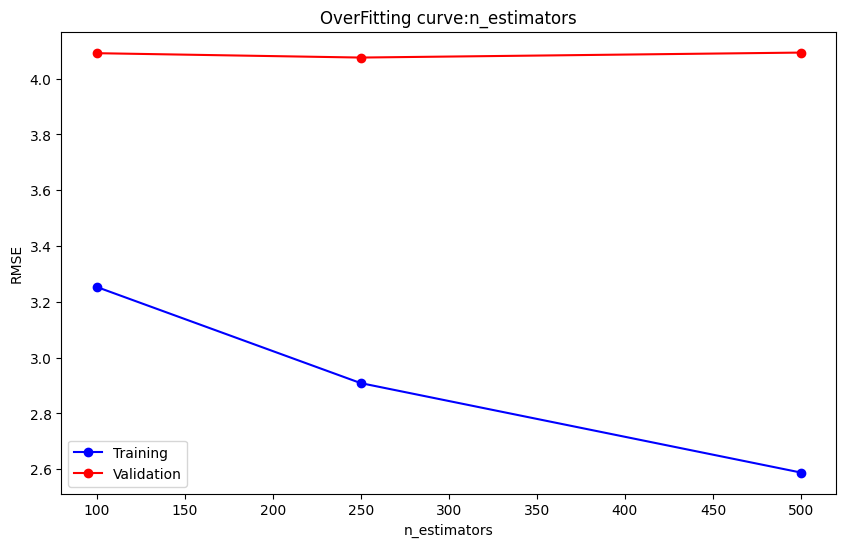

In [116]:
test_param_and_plot(XGBRegressor, 'n_estimators', [100, 250, 500], **best_params)

Seems like 500 estimators has the lowest validation loss. However, it also takes a long time. Let's stick with 250 for now.



In [117]:
best_params['n_estimators'] = 250

Max Depth

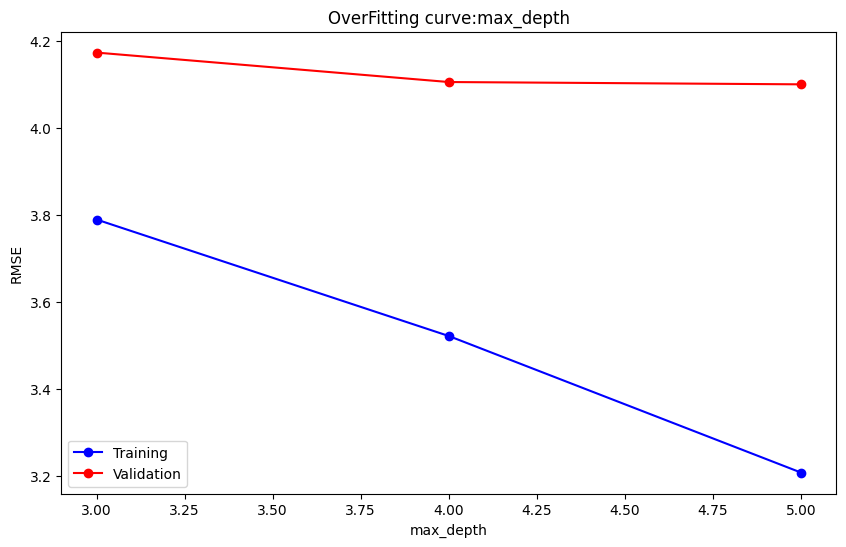

In [118]:
test_param_and_plot(XGBRegressor, 'max_depth', [3,4,5], **best_params)

Looks like a max depth of 5 is ideal.

In [119]:
best_params['max_depth'] = 5

Learning Rate

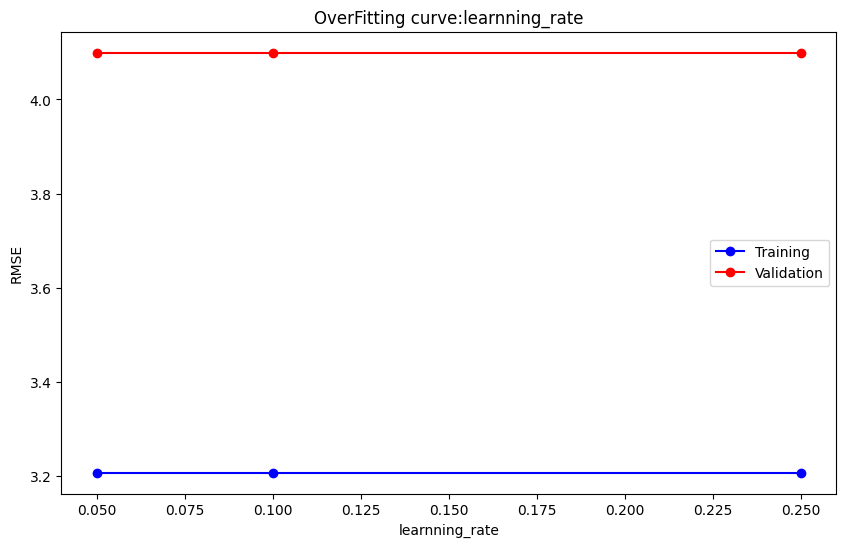

In [121]:
test_param_and_plot(XGBRegressor, 'learnning_rate', [0.05, 0.1, 0.25], **best_params)

No words

In [122]:
best_params['learning_rate'] = 0.25

Other Parameters

Here's a set of parameters that works well:

In [123]:
xgb_model_final = XGBRegressor(objective='reg:squarederror', n_jobs=-1, random_state=42,
                               n_estimators=500, max_depth=5, learning_rate=0.1, 
                               subsample=0.8, colsample_bytree=0.8)

In [124]:
xgb_model_final.fit(train_inputs, train_targets)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=500, n_jobs=-1,
             num_parallel_tree=None, random_state=42, ...)

In [125]:
evaluate(xgb_model_final)

(np.float32(3.336424),
 np.float32(4.085124),
 array([ 7.6405916,  8.366946 ,  9.427133 , ..., 11.178599 ,  8.890784 ,
        10.155793 ], dtype=float32),
 array([12.919972 ,  6.2546325, 48.575836 , ...,  8.264478 , 30.686256 ,
         7.251905 ], dtype=float32))